In [260]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [261]:
base_path = 'C:\\data_sets'

file_name = 'bank-additional-full.csv'

file_path = os.path.join(base_path, file_name)

bank_data = pd.read_csv(file_path, sep=';', index_col=None)

In [262]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [263]:
bank_data.info()
bank_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [264]:
unknown_counts = bank_data.isin(['unknown']).sum()
print(unknown_counts)

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [265]:
#Porcentaje de valores unknown por variable
unknown_proportion = (unknown_counts / bank_data.shape[0]).round(3)

print(unknown_proportion)

age               0.000
job               0.008
marital           0.002
education         0.042
default           0.209
housing           0.024
loan              0.024
contact           0.000
month             0.000
day_of_week       0.000
duration          0.000
campaign          0.000
pdays             0.000
previous          0.000
poutcome          0.000
emp.var.rate      0.000
cons.price.idx    0.000
cons.conf.idx     0.000
euribor3m         0.000
nr.employed       0.000
y                 0.000
dtype: float64


In [266]:
unknown_columns_list = ['job', 'marital', 'education', 'default', 'housing', 'loan']

for column in unknown_columns_list:
    print(f"-COLUMNA: {column}")
    print(bank_data[column].value_counts())
    print("-" * 30)

-COLUMNA: job
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
------------------------------
-COLUMNA: marital
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
------------------------------
-COLUMNA: education
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
------------------------------
-COLUMNA: default
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
------------------------------
-COLUMNA: housing
housing
yes        2157

In [267]:
bank_data['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [268]:
#Filtro variables unknown alineadas a mas de un valor
filter_unknown = bank_data[unknown_columns_list].apply(lambda row: (row == 'unknown').sum() > 1, axis=1)

unknown_aligned_rows = bank_data[filter_unknown]

print(len(unknown_aligned_rows))

1666


In [269]:
unknown_proportion_df = len(unknown_aligned_rows) / len(bank_data)
print(unknown_proportion_df)

0.04044867437117607


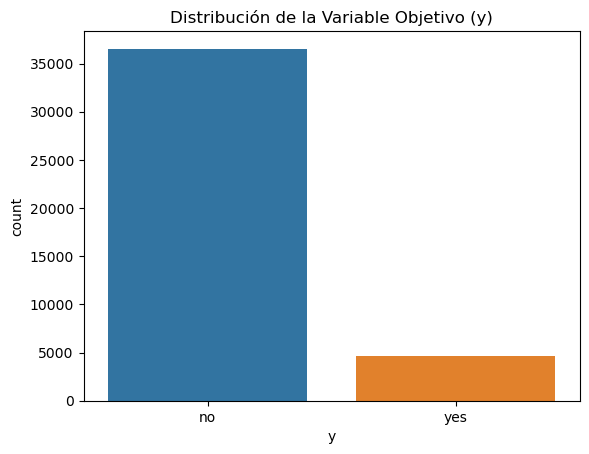

In [270]:
#Balance variable objetivo
sns.countplot(x='y', data=bank_data)
plt.title('Distribución de la Variable Objetivo (y)')
plt.show()

In [271]:
y = bank_data['y']

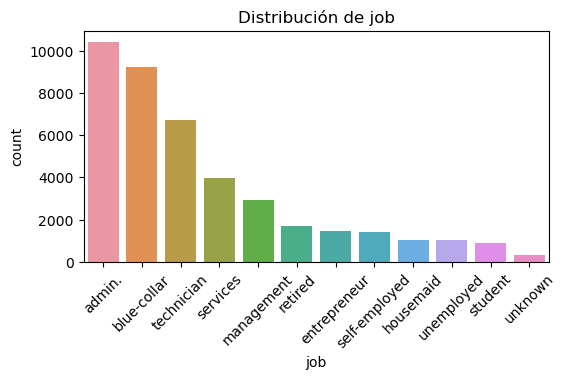

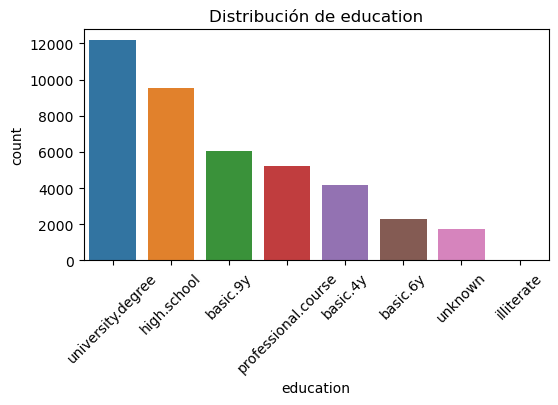

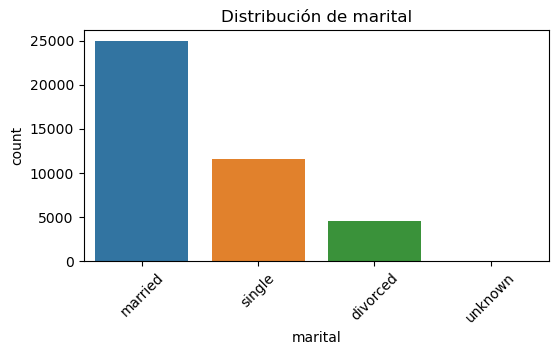

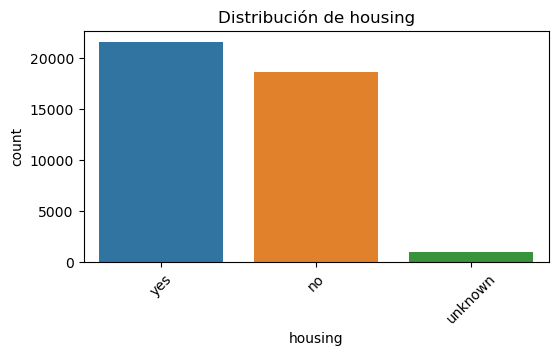

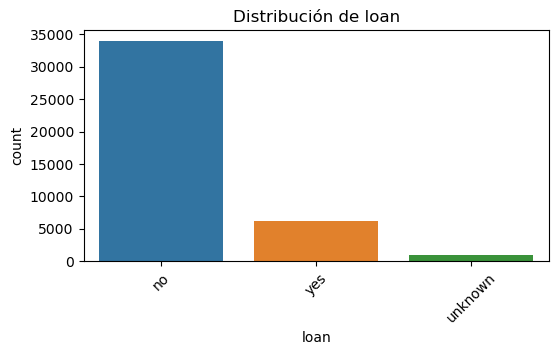

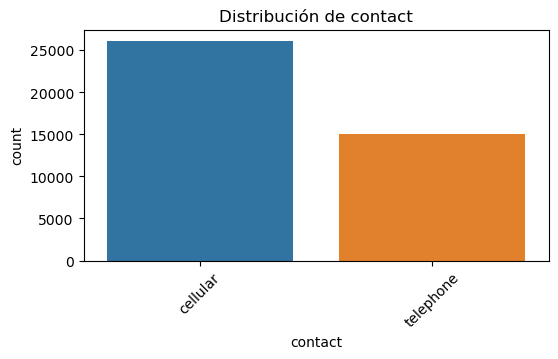

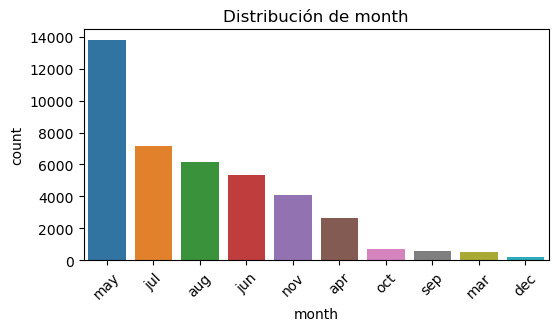

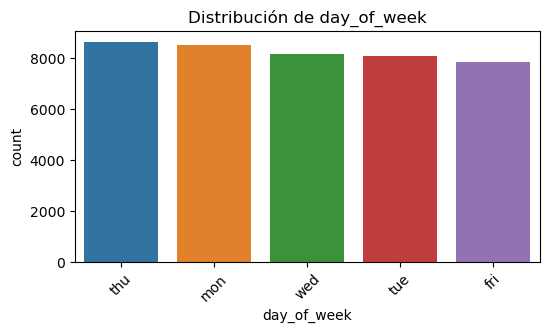

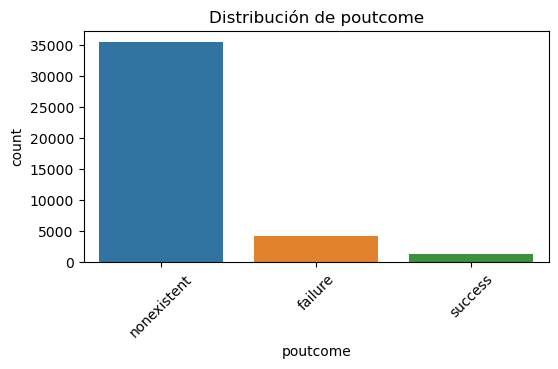

In [272]:
#Visualiso distribuciones categóricas
categorical = ['job', 'education', 'marital', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for var in categorical:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=var, data=bank_data, order=bank_data[var].value_counts().index)
    plt.title(f'Distribución de {var}')
    plt.xticks(rotation=45)
    plt.show()

C:\Users\prueb\anaconda3\envs\desafio\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


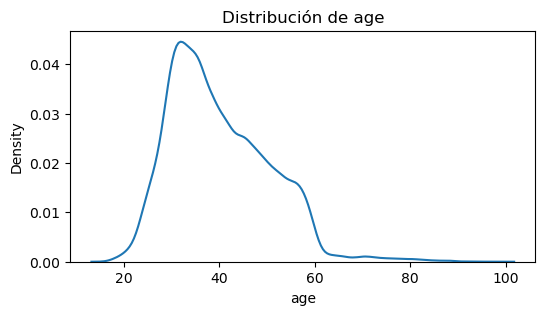

C:\Users\prueb\anaconda3\envs\desafio\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


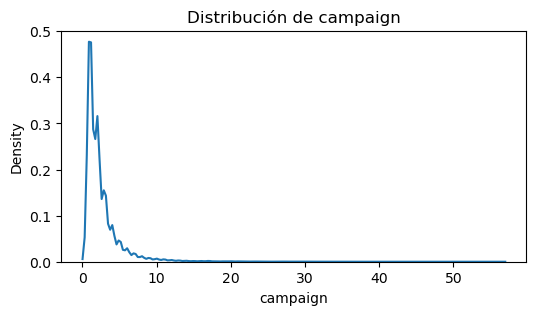

C:\Users\prueb\anaconda3\envs\desafio\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


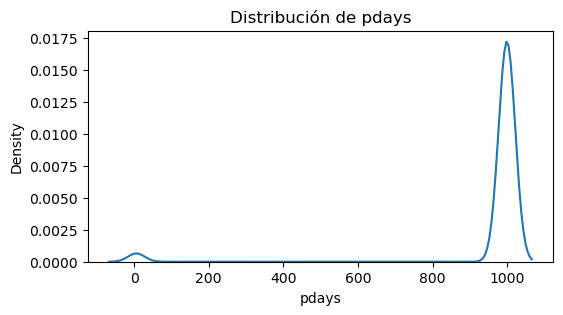

C:\Users\prueb\anaconda3\envs\desafio\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


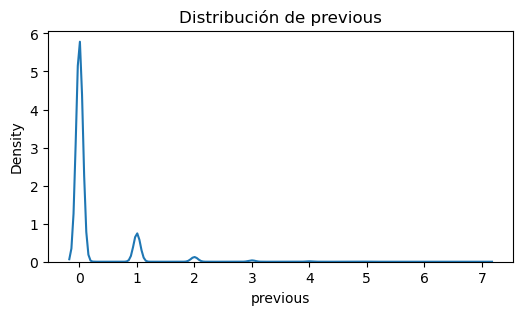

C:\Users\prueb\anaconda3\envs\desafio\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


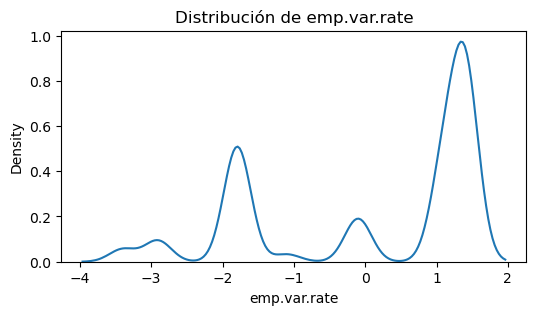

C:\Users\prueb\anaconda3\envs\desafio\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


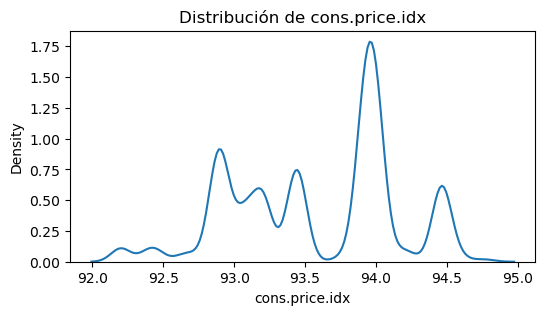

C:\Users\prueb\anaconda3\envs\desafio\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


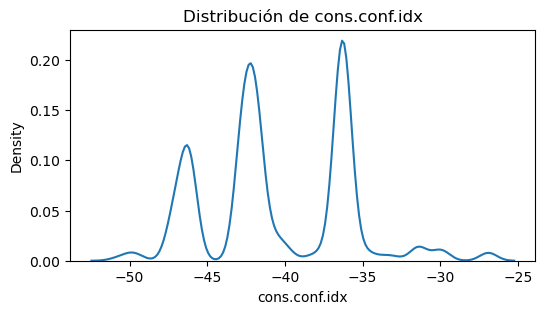

C:\Users\prueb\anaconda3\envs\desafio\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


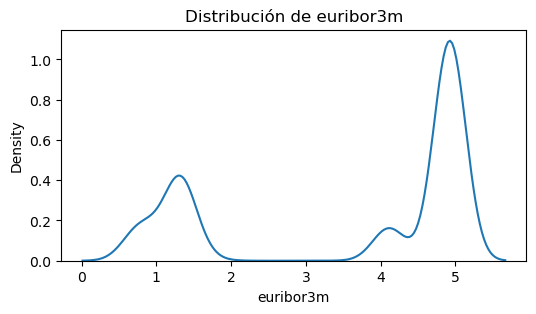

C:\Users\prueb\anaconda3\envs\desafio\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


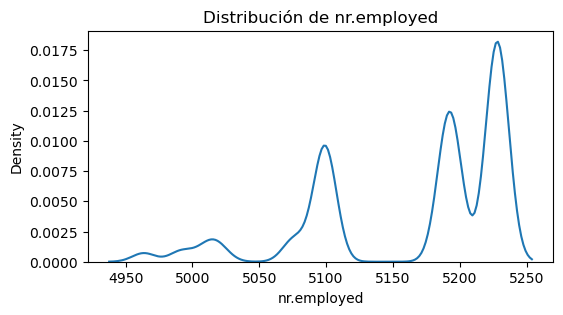

In [273]:
#Visualiso distribuciones numéricas
numerical = ['age', 'campaign', 'pdays', 'previous', 
                  'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for var in numerical:
    plt.figure(figsize=(6, 3))
    sns.kdeplot(bank_data[var])
    plt.title(f'Distribución de {var}')
    plt.show()


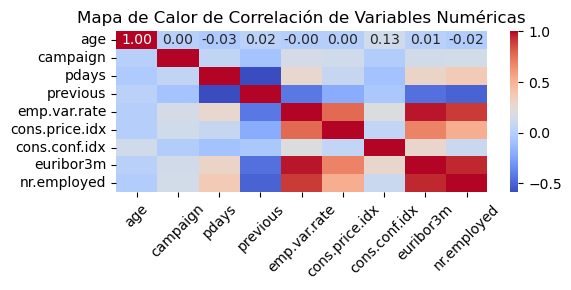

In [274]:
# Calculo correlaciones numéricas
corr_matrix = bank_data[numerical].corr()

plt.figure(figsize=(6, 3))
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor de Correlación de Variables Numéricas')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

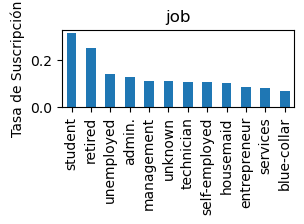

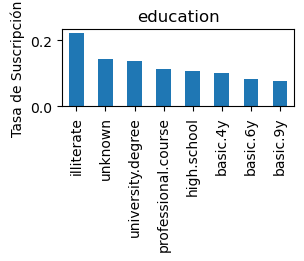

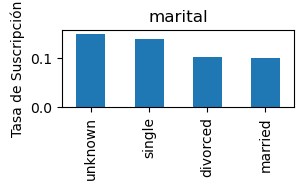

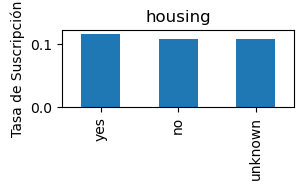

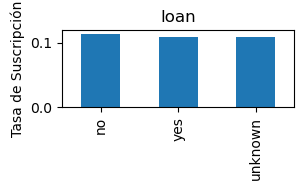

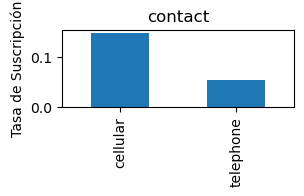

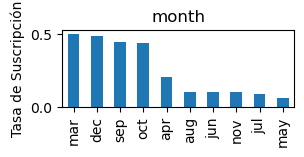

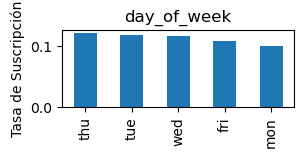

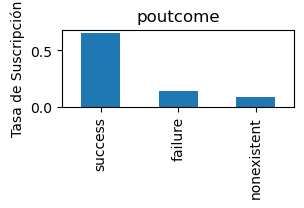

In [278]:
#Visualizo tasa de suscripción (y) por variable
for var in categorical:
    subscription_rate = bank_data.groupby(var)['y'].value_counts(normalize=True).loc[:, "yes"]

    plt.figure(figsize=(3, 1))
    subscription_rate.sort_values(ascending=False).rename_axis(None).plot(kind='bar')
    plt.title(f"{var}")
    plt.ylabel('Tasa de Suscripción')
    plt.show()


In [279]:
#Realizo prueba de chi2
from scipy.stats import chi2_contingency

results = []

for var in categorical:
    contingency_table = pd.crosstab(bank_data[var], bank_data['y'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append({'Variable': var, 'Chi cuadrado': chi2, 'P-valor': p, 'DOF': dof})

chi2_results = pd.DataFrame(results).sort_values(by='P-valor', ascending=True)

print(chi2_results)

      Variable  Chi cuadrado        P-valor  DOF
6        month   3101.149351   0.000000e+00    9
8     poutcome   4230.523798   0.000000e+00    2
0          job    961.242440  4.189763e-199   11
5      contact    862.318364  1.525986e-189    1
1    education    193.105905   3.305189e-38    7
2      marital    122.655152   2.068015e-26    3
7  day_of_week     26.144939   2.958482e-05    4
3      housing      5.684496   5.829448e-02    2
4         loan      1.094028   5.786753e-01    2


- "job" y "education" son las variables que muestran una corr mas significativa con la variable objetivo
- loan no muestra una corr significativa

In [280]:
bank_data = bank_data.drop('duration', axis=1)

In [281]:
#Numero variable objetivo
bank_data['y'] = bank_data['y'].map({'yes': 1, 'no': 0})

In [282]:
#Vuelvo a definir las variables categorical y numerical, esta vez sin algunas columnas que no ingresarán al modelo

numerical = ['campaign', 'pdays', 'previous', 
                  'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical = ['job', 'education', 'marital', 'contact', 'month', 'poutcome']

drop_variables = ["age", "loan", "housing", "day_of_week"]
bank_data_modified = bank_data.drop(drop_variables, axis=1)

In [283]:
X = bank_data_modified.drop('y', axis=1)
y = bank_data['y']

In [284]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [285]:
from sklearn.impute import SimpleImputer

imputed_categorical = ['job', 'marital', 'education', 'default']

mode_imputer = SimpleImputer(strategy='most_frequent', missing_values='unknown')
X_train[imputed_categorical] = mode_imputer.fit_transform(X_train[imputed_categorical])
X_test[imputed_categorical] = mode_imputer.transform(X_test[imputed_categorical])

In [286]:
categorical = ['job', 'education', 'marital', 'contact', 'month', 'poutcome']
imputed_categorical = ['job', 'marital', 'education', 'default']

categorical = list(set(categorical) | set(imputed_categorical))


In [287]:
#Codifico y normalizo las variables
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

CT = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical),
        ('num', StandardScaler(), numerical)
    ]
)

X_train = CT.fit_transform(X_train)
X_test = CT.transform(X_test)

In [288]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
xgb = xgb.XGBClassifier()

In [289]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

skf = StratifiedKFold(n_splits=6, random_state=42, shuffle=True)
metrics = ['recall']

def evaluate_model(model, X_train, y_train, cv, scoring):
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=metrics)
    return cv_results

lr_results = evaluate_model(lr, X_train, y_train, skf, metrics)

rf_results = evaluate_model(rf, X_train, y_train, skf, metrics)

xgb_results = evaluate_model(xgb, X_train, y_train, skf, metrics)


In [290]:
from sklearn.model_selection import GridSearchCV

#Regresión Logística
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

#Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20]
}

#XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.2, 0.5],
    'max_depth': [3, 6, 9],
}

#Ajusto GridSearchCV para Regresión Logística
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=skf, scoring='recall', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
print("Mejores hiperparámetros para Regresión Logística:", grid_search_lr.best_params_)
print("Mejor puntuación para Regresión Logística:", grid_search_lr.best_score_)

#Ajusto GridSearchCV para Random Forest
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=skf, scoring='recall', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print("Mejores hiperparámetros para Random Forest:", grid_search_rf.best_params_)
print("Mejor puntuación para Random Forest:", grid_search_rf.best_score_)

#Ajusto GridSearchCV para XGBoost
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=skf, scoring='recall', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)
print("Mejores hiperparámetros para XGBoost:", grid_search_xgb.best_params_)
print("Mejor puntuación para XGBoost:", grid_search_xgb.best_score_)


Mejores hiperparámetros para Regresión Logística: {'C': 1, 'solver': 'liblinear'}
Mejor puntuación para Regresión Logística: 0.22779998216655392
Mejores hiperparámetros para Random Forest: {'max_depth': 20, 'n_estimators': 100}
Mejor puntuación para Random Forest: 0.29932390258742325
Mejores hiperparámetros para XGBoost: {'learning_rate': 0.5, 'max_depth': 9, 'n_estimators': 300}
Mejor puntuación para XGBoost: 0.32658547203558297


In [292]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth=6, n_estimators=300, random_state=42, scale_pos_weight= 9, subsample= 0.8, learning_rate=0.05)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [293]:
y_pred = xgb_model.predict(X_test)

In [294]:
from sklearn.metrics import confusion_matrix, classification_report

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("Informe de clasificación:")
print(classification_report(y_test, y_pred))


Matriz de confusión:
[[6188 1115]
 [ 355  580]]
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.85      0.89      7303
           1       0.34      0.62      0.44       935

    accuracy                           0.82      8238
   macro avg       0.64      0.73      0.67      8238
weighted avg       0.88      0.82      0.84      8238

